### Summary of the Terminal commands used ###

__mkdir lab02__: make directory named lab02  
__cd lab02__: change directory to new lab02 directory  
__mkdir src__: make directory src (source code)  
__mkdir data__: make directory data (to store data)  
__cd data__: enter data directory  
#### used jupyter notebook to upload seqs.fasta####
__muscle -in seqs.fa -out seqs.aligned.fa__ : call muscle command given seqs.fa as input; output the aligned version of the sequences as seqs.aligned.fa  
__more seqs.fa__ & __more seqs.aligned.fa__ : 2 separate commands to view differences between input and output files  
__fasttree –nt seqs.aligned.fa > tree.nwk__ : generate a newick-formatted tree
 


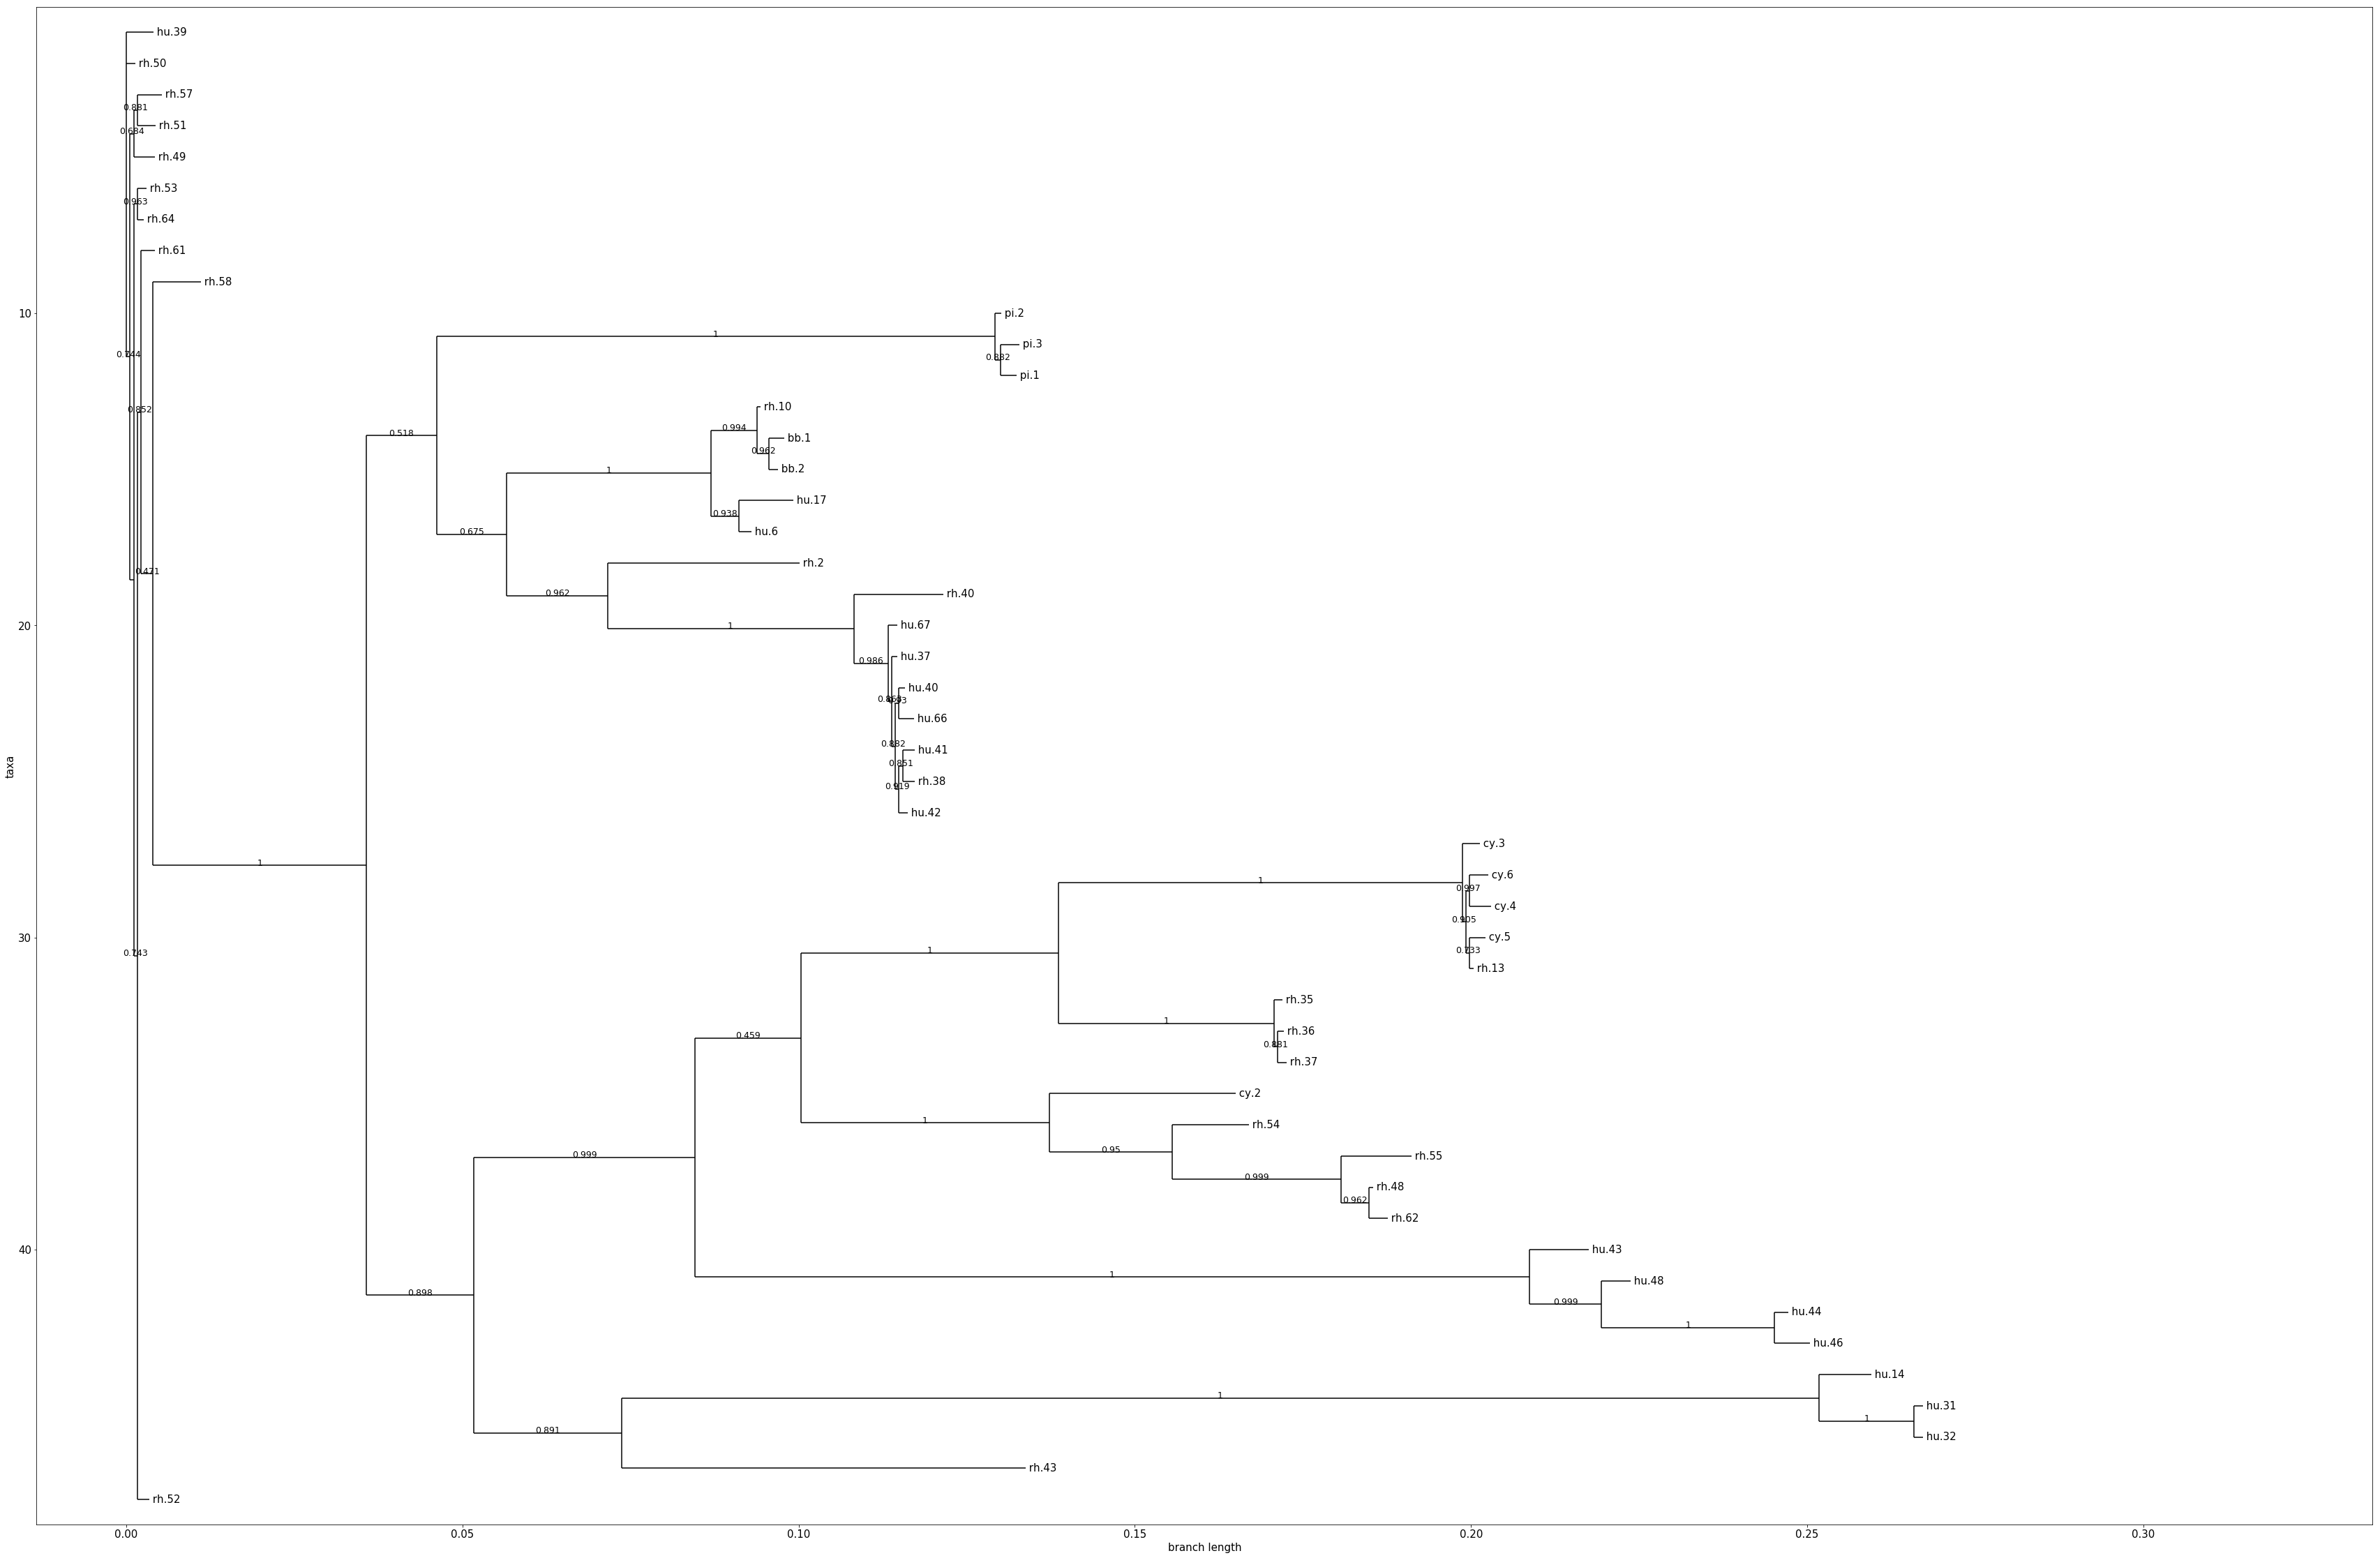

In [51]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

# read in the tree object
tree = Phylo.read("tree.nwk", "newick")
# set the font size and figure size
mpl.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [60, 40]
#plot the graph
Phylo.draw(tree)


In [52]:
from Bio import SeqIO
my_seqs = [];
obvious_clusters = ["pi.3", "bb.2", "hu.40", "cy.6", "rh.36", "rh.51", "rh.48", "hu.48", "hu.31"];
for seq in SeqIO.parse("seqs.fa", "fasta"):
    if seq.id in obvious_clusters:
        my_seqs.append(seq)
for seq in my_seqs:
    print(seq.id + ":")
    print(seq.seq)
        

bb.2:
atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactcctctacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacggagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagcctcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggca

__BLAST__  

bb.2 : Non-human primate Adeno-associated virus isolate AAVbb.2 capsid protein (VP1) gene, complete cds   

cy.6 : Non-human primate Adeno-associated virus isolate AAVcy.6 capsid protein (VP1) gene, complete cds  

hu.31:Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene, complete cds  

hu.40: Adeno-associated virus isolate hu.40 capsid protein VP1 (cap) gene, complete cds  

hu.48: Adeno-associated virus isolate hu.48 capsid protein VP1 (cap) gene, complete cds  

pi.3:  Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds  

rh.36: Non-human primate Adeno-associated virus isolate AAVrh.36 capsid protein (VP1) gene, complete cds  

rh.48: Adeno-associated virus isolate rh.48 capsid protein VP1 (cap) gene, complete cds  

rh.51: Adeno-associated virus isolate rh.51 capsid protein VP1 (cap) gene, complete cds  

__What are some of the most common matches for each cluster? Write them down in your lab notebook. Do they all match the same gene? Are there any that definitely do not match the others? Why might we not trust the annotations for sequences that come up in our BLAST?__  

The most common match for each cluster follows the same format as those listed above, with some variation in the particular capsid proteins isolated. They all seem to match the VP1 gene. As mentioned in lecture, it's important to note that a lot of databases are inherently biased in the information they store, based on the historical trends in the gathering and publishing of data.



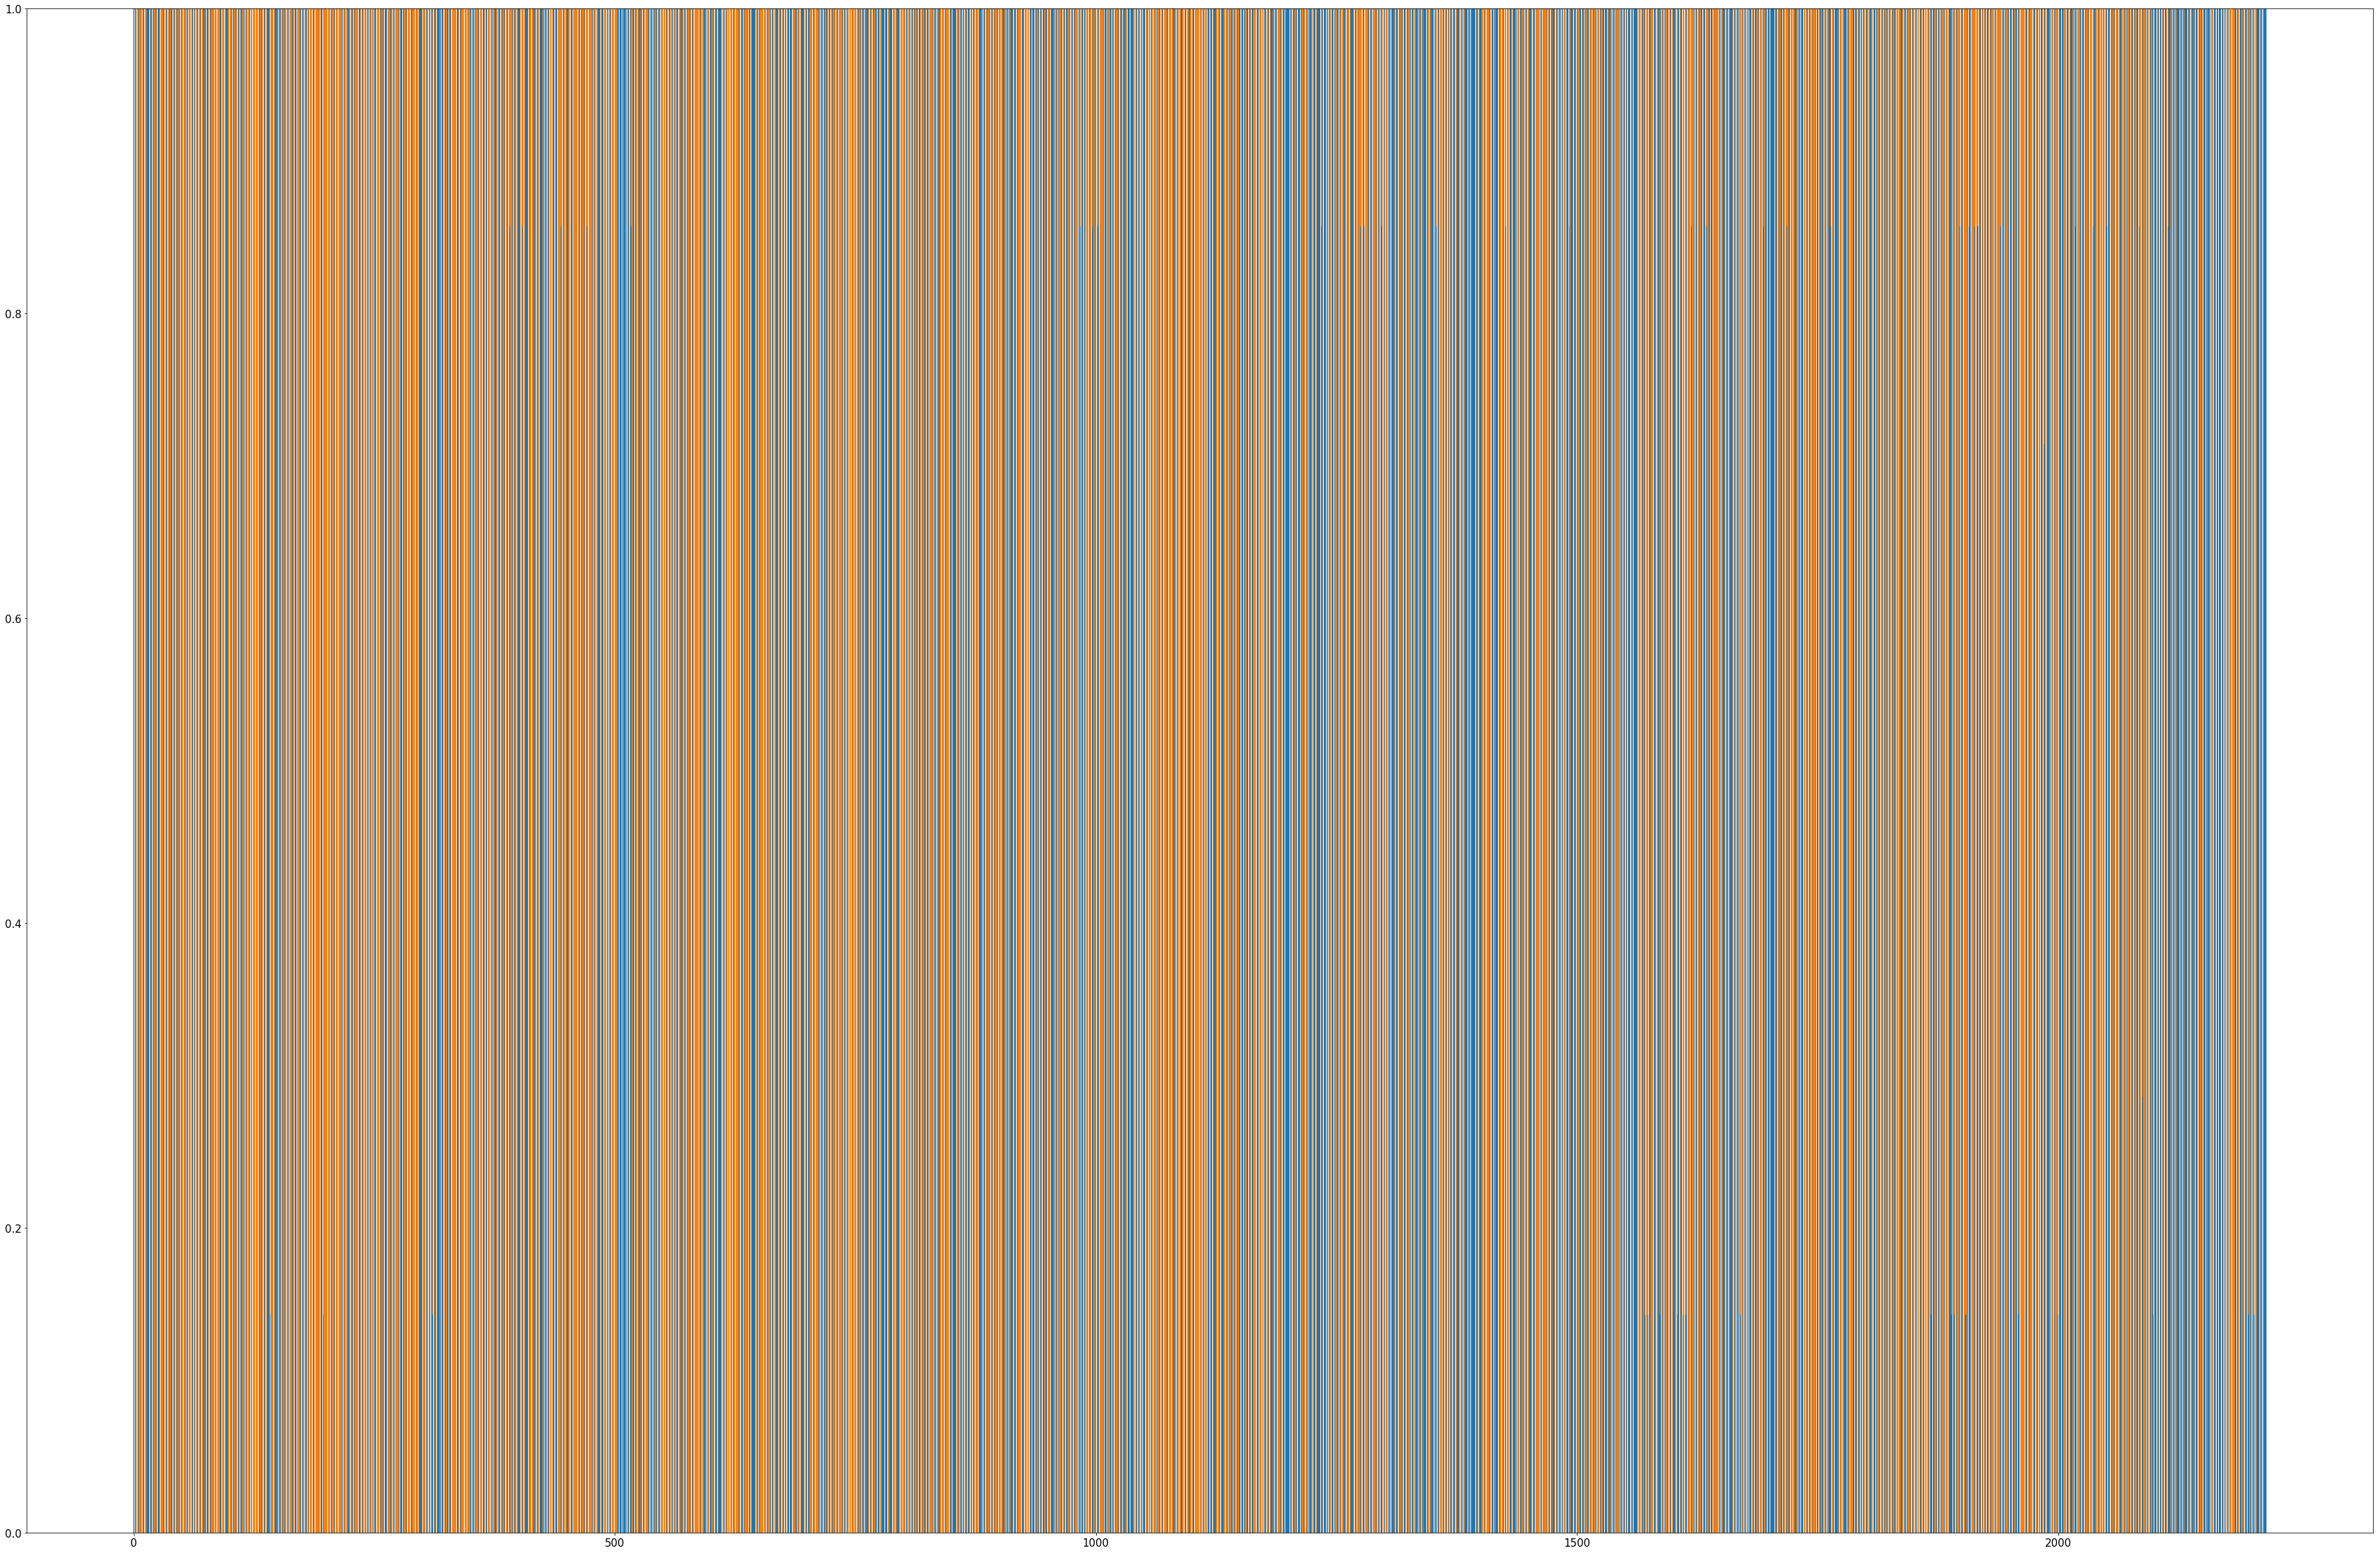

In [53]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
cluster1 = ["rh.40", "hu.67", "hu.40", "hu.37", "hu.66", "hu.38", "hu.41", "hu.42"]
cluster2 = ["rh.10", "bb.1", "hu.6", "bb.2", "hu.17", "rh.2"]
cluster3 = ["pi.2", "pi.3", "pi.1"]
cluster4 = ["hu.39", "rh.50", "rh.51", "rh.49", "rh.57", "rh.61", "rh.64", "rh.58", "rh.53"]
cluster5 = ["cy.6", "cy.3", "cy.4", "cy.5", "rh.13"]
cluster6 = ["rh.35", "rh.36", "rh.37"]
cluster7 = ["rh.48", "rh.55", "rh.62"]
cluster8 = ["hu.14", "hu.31", "hu.38"]
def clusterseq_maker(cluster):
    my_seqs =[];
    for seq in SeqIO.parse("seqs.fa", "fasta"):
        if seq.id in cluster:
            my_seqs.append(SeqRecord(seq.seq))
    return my_seqs

cluster1seqs =clusterseq_maker(cluster1)
cluster2seqs=clusterseq_maker(cluster2)
cluster3seqs=clusterseq_maker(cluster3)
cluster4seqs= clusterseq_maker(cluster4)
cluster5seqs =clusterseq_maker(cluster5)
cluster6seqs =clusterseq_maker(cluster6)
cluster7seqs =clusterseq_maker(cluster7)
cluster8seqs =clusterseq_maker(cluster8)

def msa_maker(clusterseqs):
    return MultipleSeqAlignment(clusterseqs)

msa1 = msa_maker(cluster1seqs)
msa2 = msa_maker(cluster2seqs)
msa3 = msa_maker(cluster3seqs)
msa4= msa_maker(cluster4seqs)
msa5 = msa_maker(cluster5seqs)
msa6 = msa_maker(cluster6seqs)
msa7 = msa_maker(cluster7seqs)
msa8 = msa_maker(cluster8seqs)


def atgc_counter(msa):
    atcount= []
    gccount=[]
    i = 0
    while i< len(msa[0]):
        atcount.append(0)
        gccount.append(0)
        i +=1;
    i = 0;
    while i < len(msa[0]):
        curr = msa[:,i]
        for letter in curr:
            if letter == "a" or letter == "t":
                atcount[i] +=1
            else:
                gccount[i] +=1
        i +=1
    i=0;
    while i < len(msa[0]):
        atcount[i] = atcount[i]/len(msa)
        gccount[i]= gccount[i]/len(msa)
        gccount[i] *= -1
        i += 1
    return atcount, gccount;

at1,gc1 = atgc_counter(msa1)
at2,gc2 = atgc_counter(msa2)
at3,gc3 = atgc_counter(msa3)
at4,gc4 = atgc_counter(msa4)
at5,gc5 = atgc_counter(msa5)
at6,gc6 =atgc_counter(msa6)
at7,gc7 = atgc_counter(msa7)
at8,gc8 = atgc_counter(msa8)

xvals=[]
i = 0
while i< len(msa1[0]):
    xvals.append(i)
    i += 1

xtemp = [1,2,3,4,5,6,7,8,9,10]
fig1 = plt.figure()
ax = fig1.add_subplot(111)
bar1 = ax.bar(height=at1, x= xvals)
bar2 = ax.bar(height= gc1, x= xvals, bottom = 1)


# bar2 = plt.bar(height=at2, x= xvals)
# #bar3 = plt.bar(height=at3, x= xvals)
# bar4 = plt.bar(height=at4, x= xvals)
# #bar5 = plt.bar(height=at5, x= xvals)
# # bar6 = plt.bar(height=at6, x= xvals)
# # bar7 = plt.bar(height=at7, x= xvals)
# # bar8 = plt.bar(height=at8, x= xvals)


<BarContainer object of 2217 artists>

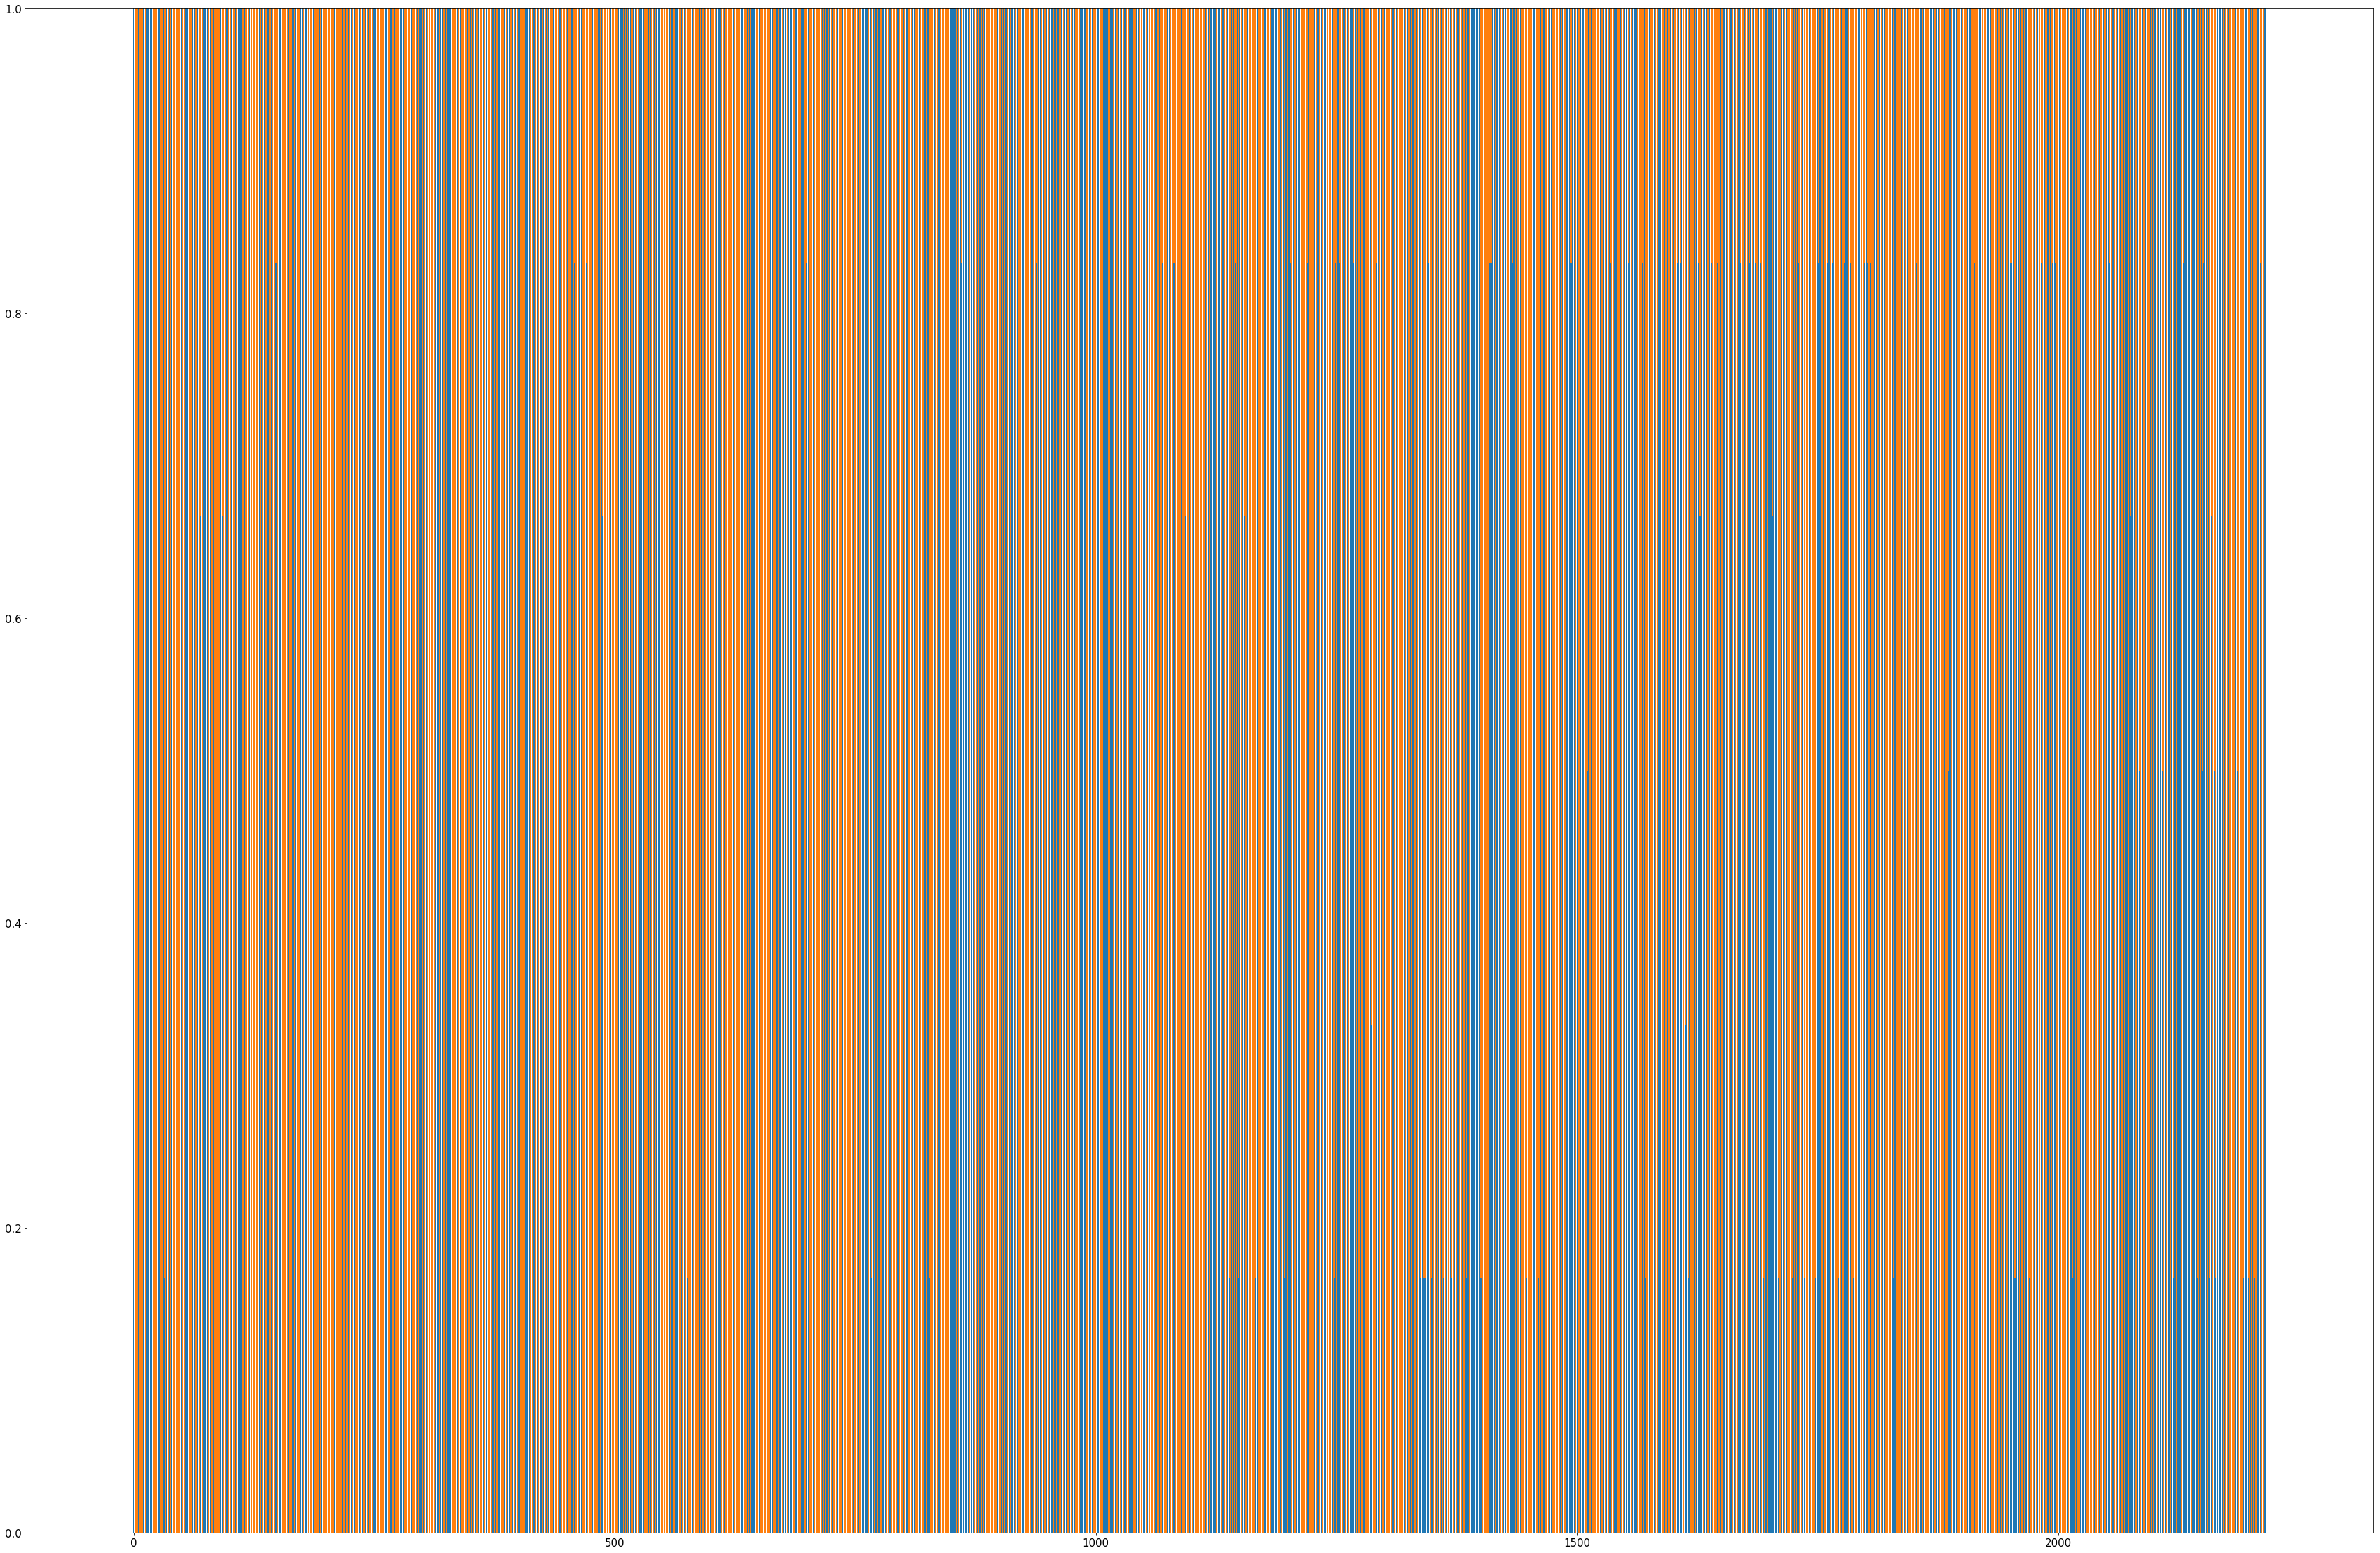

In [54]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
fig2= plt.bar(height= at2, x= xvals)
plt.bar(height= gc2, x= xvals, bottom = 1)

<BarContainer object of 2196 artists>

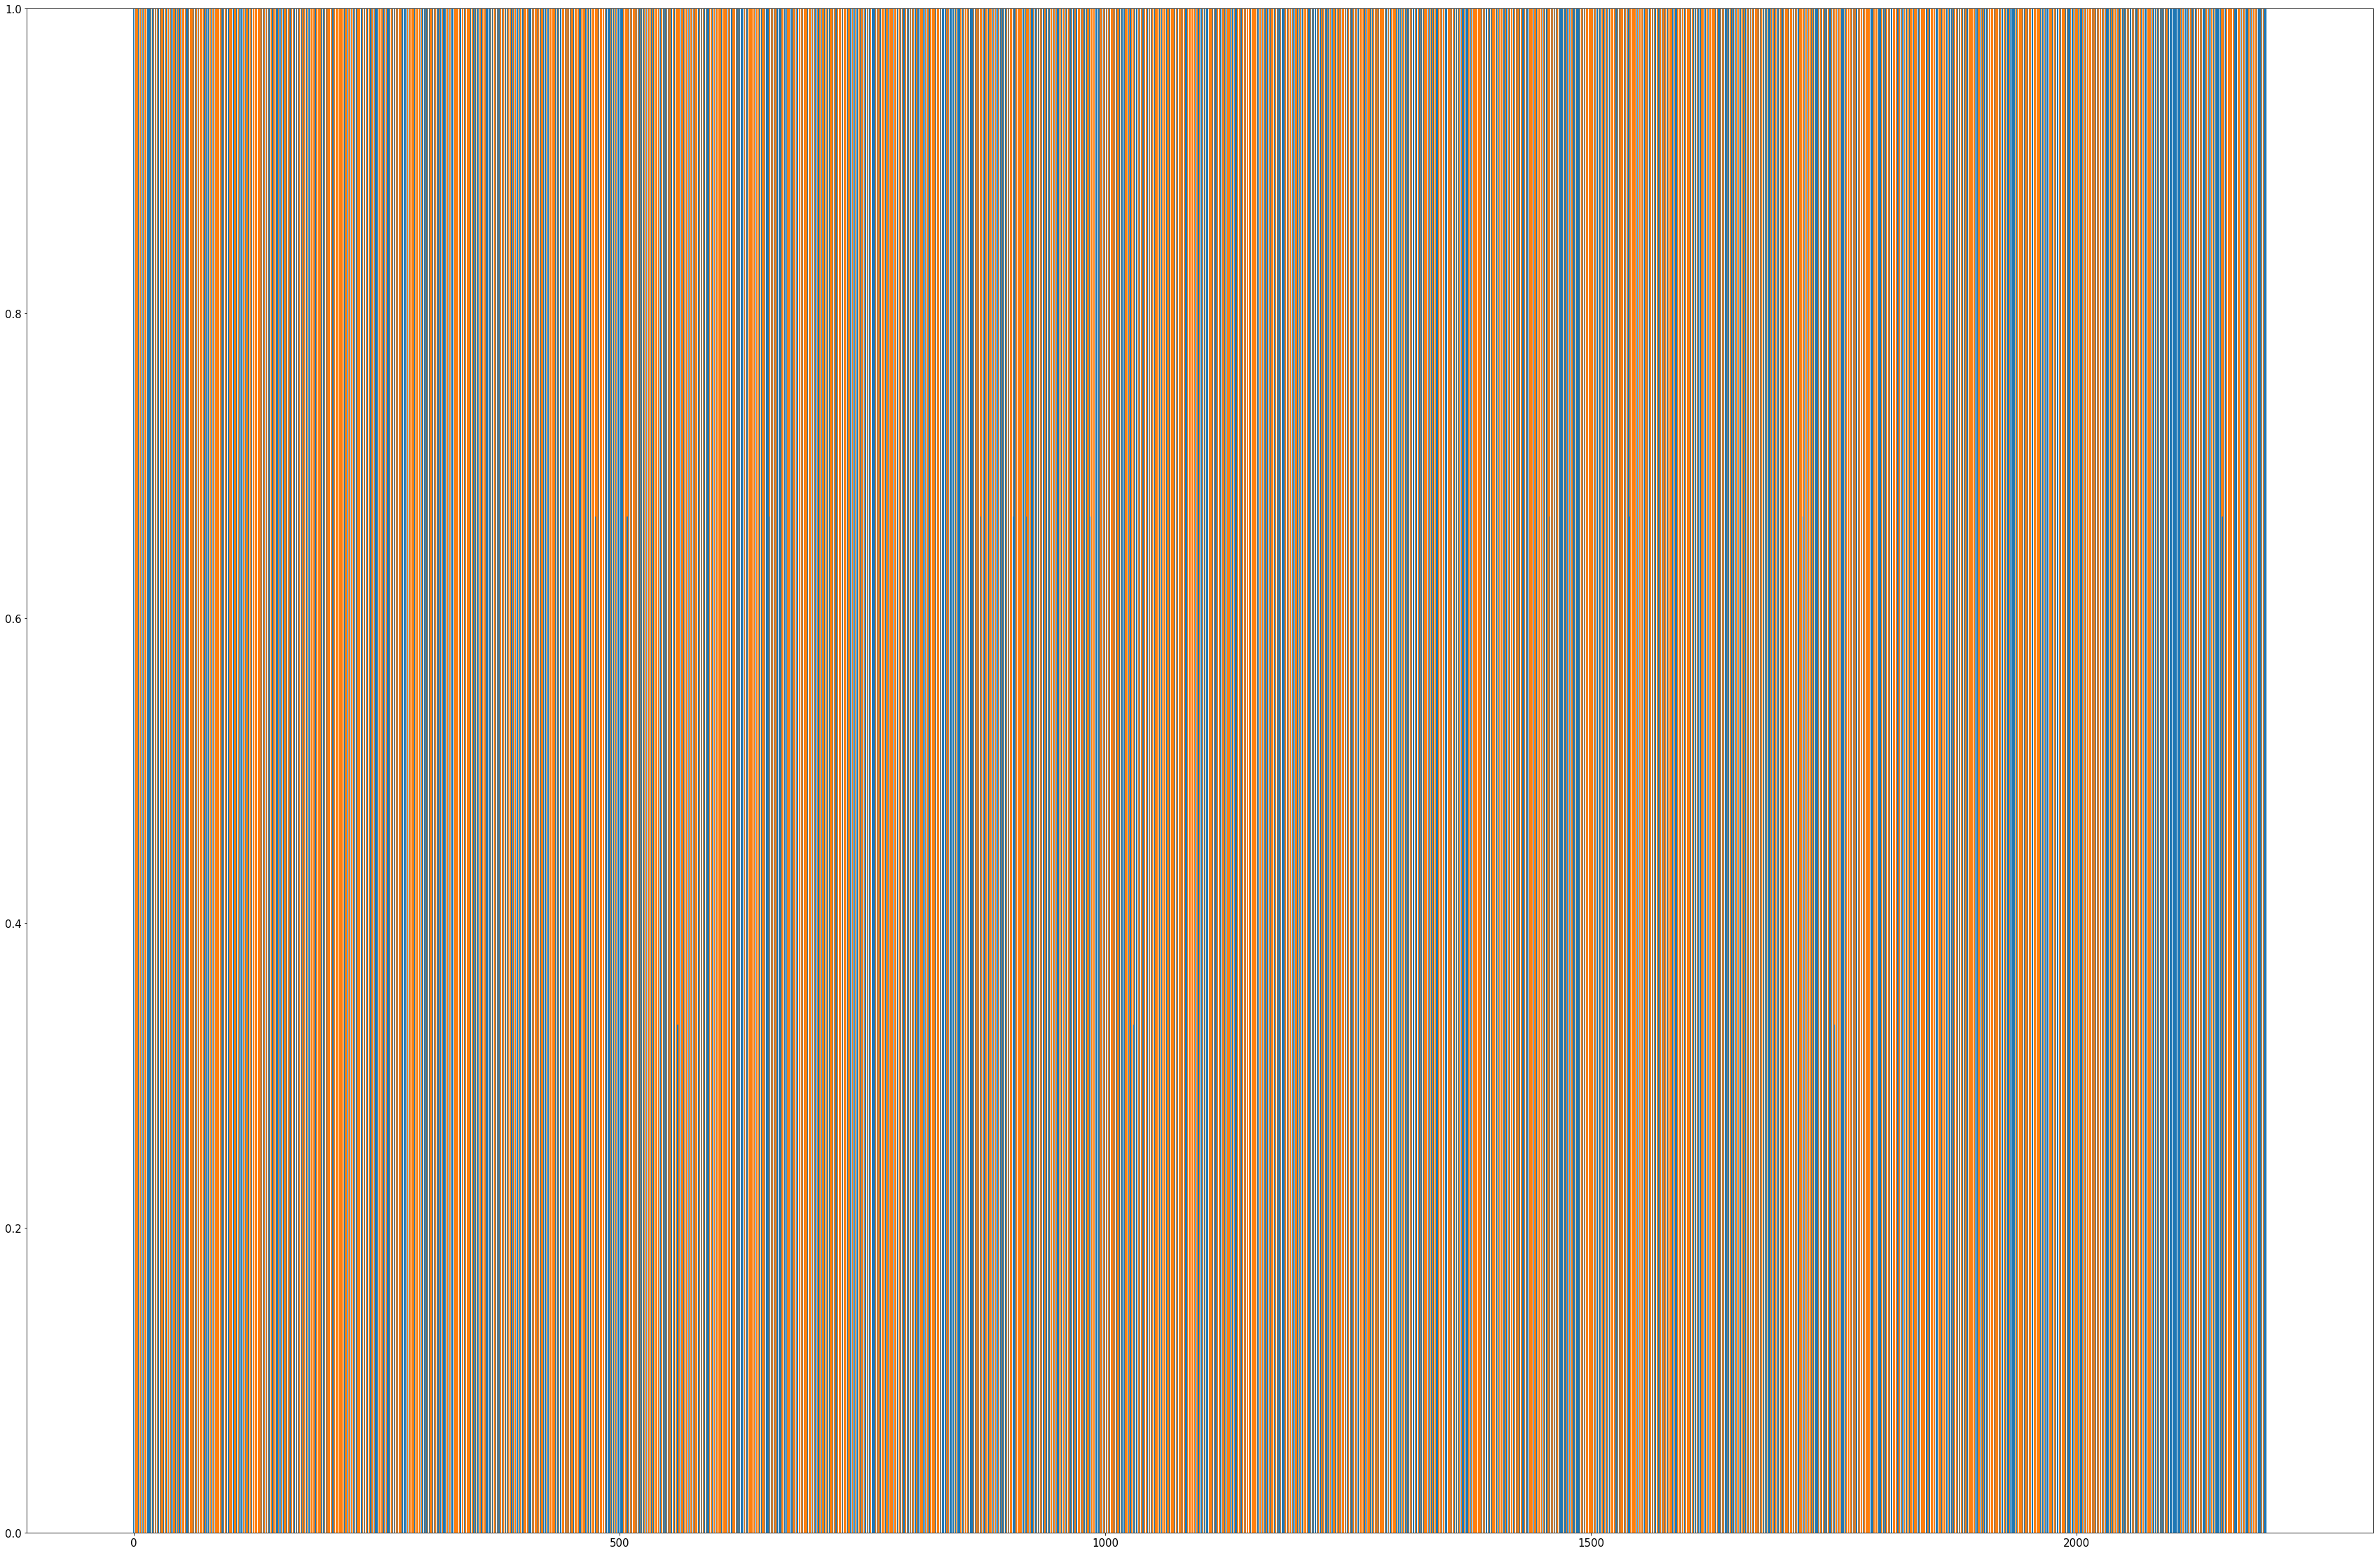

In [59]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
xvals3=[]
i = 0
while i< len(msa3[0]):
    xvals3.append(i)
    i += 1
fig3= plt.bar(height= at3, x= xvals3)
plt.bar(height= gc3, x= xvals3, bottom = 1)

<BarContainer object of 2217 artists>

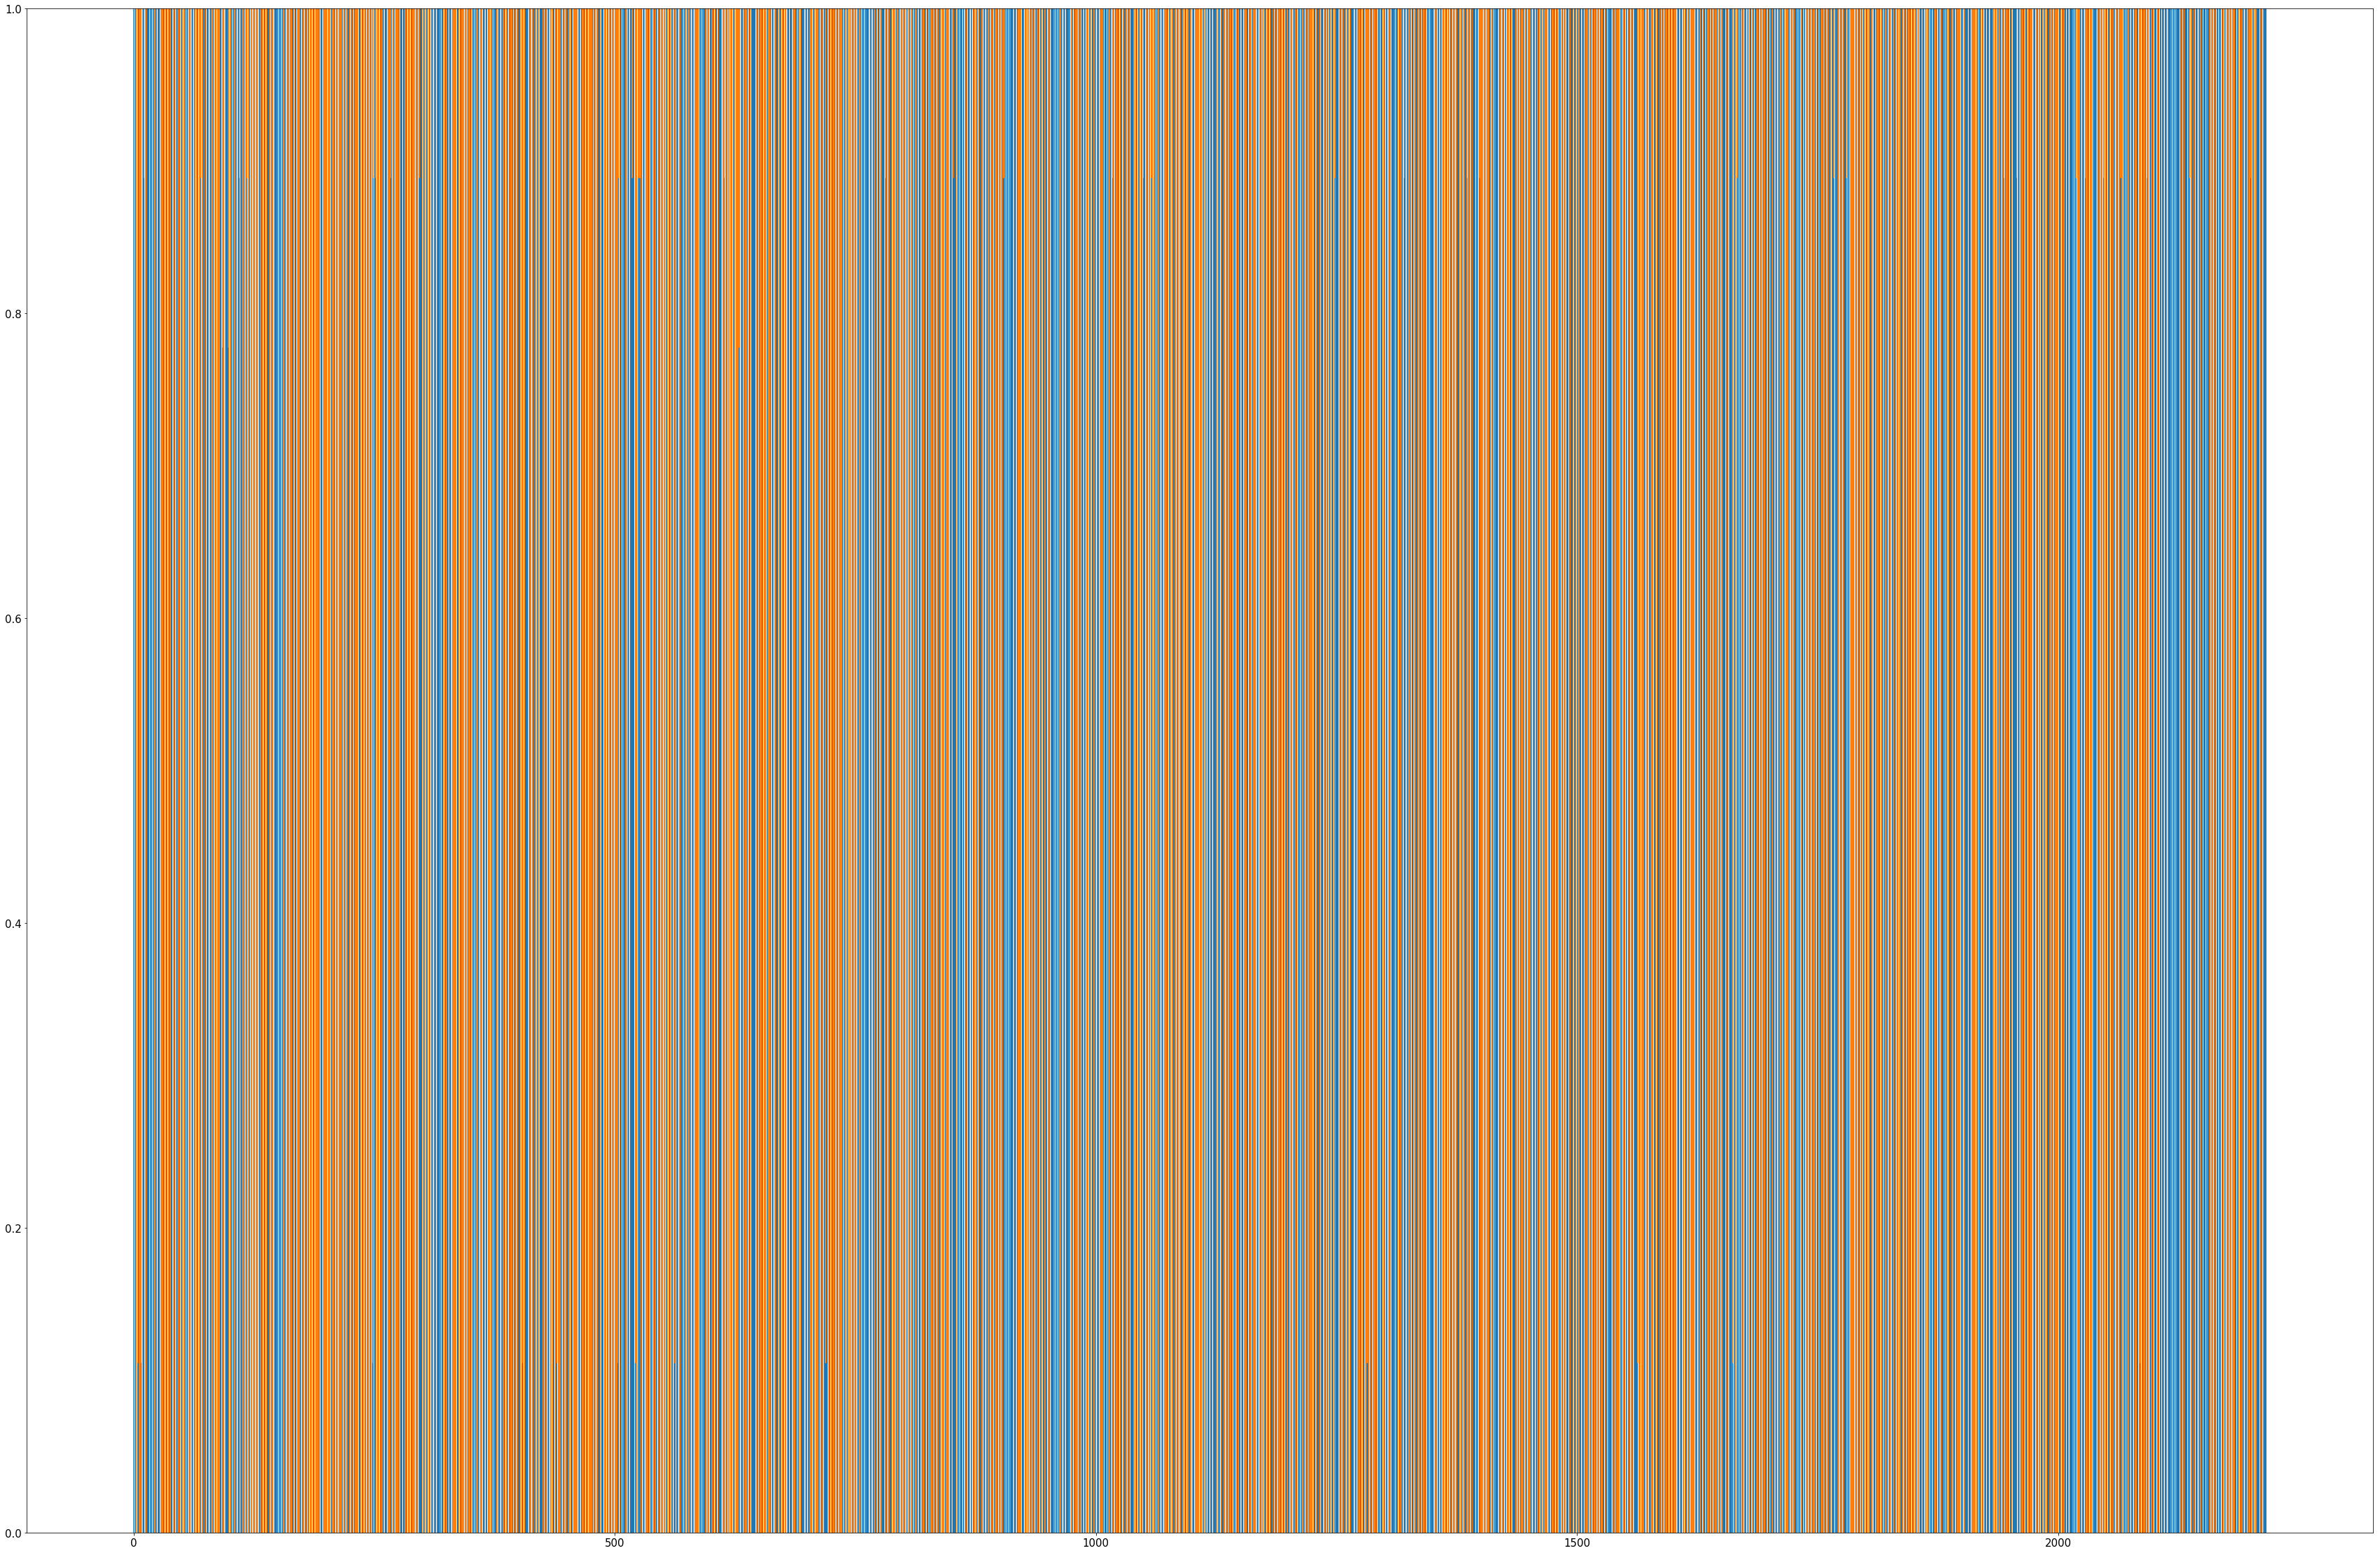

In [57]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
fig4= plt.bar(height= at4, x= xvals)
plt.bar(height= gc4, x= xvals, bottom = 1)

<BarContainer object of 2187 artists>

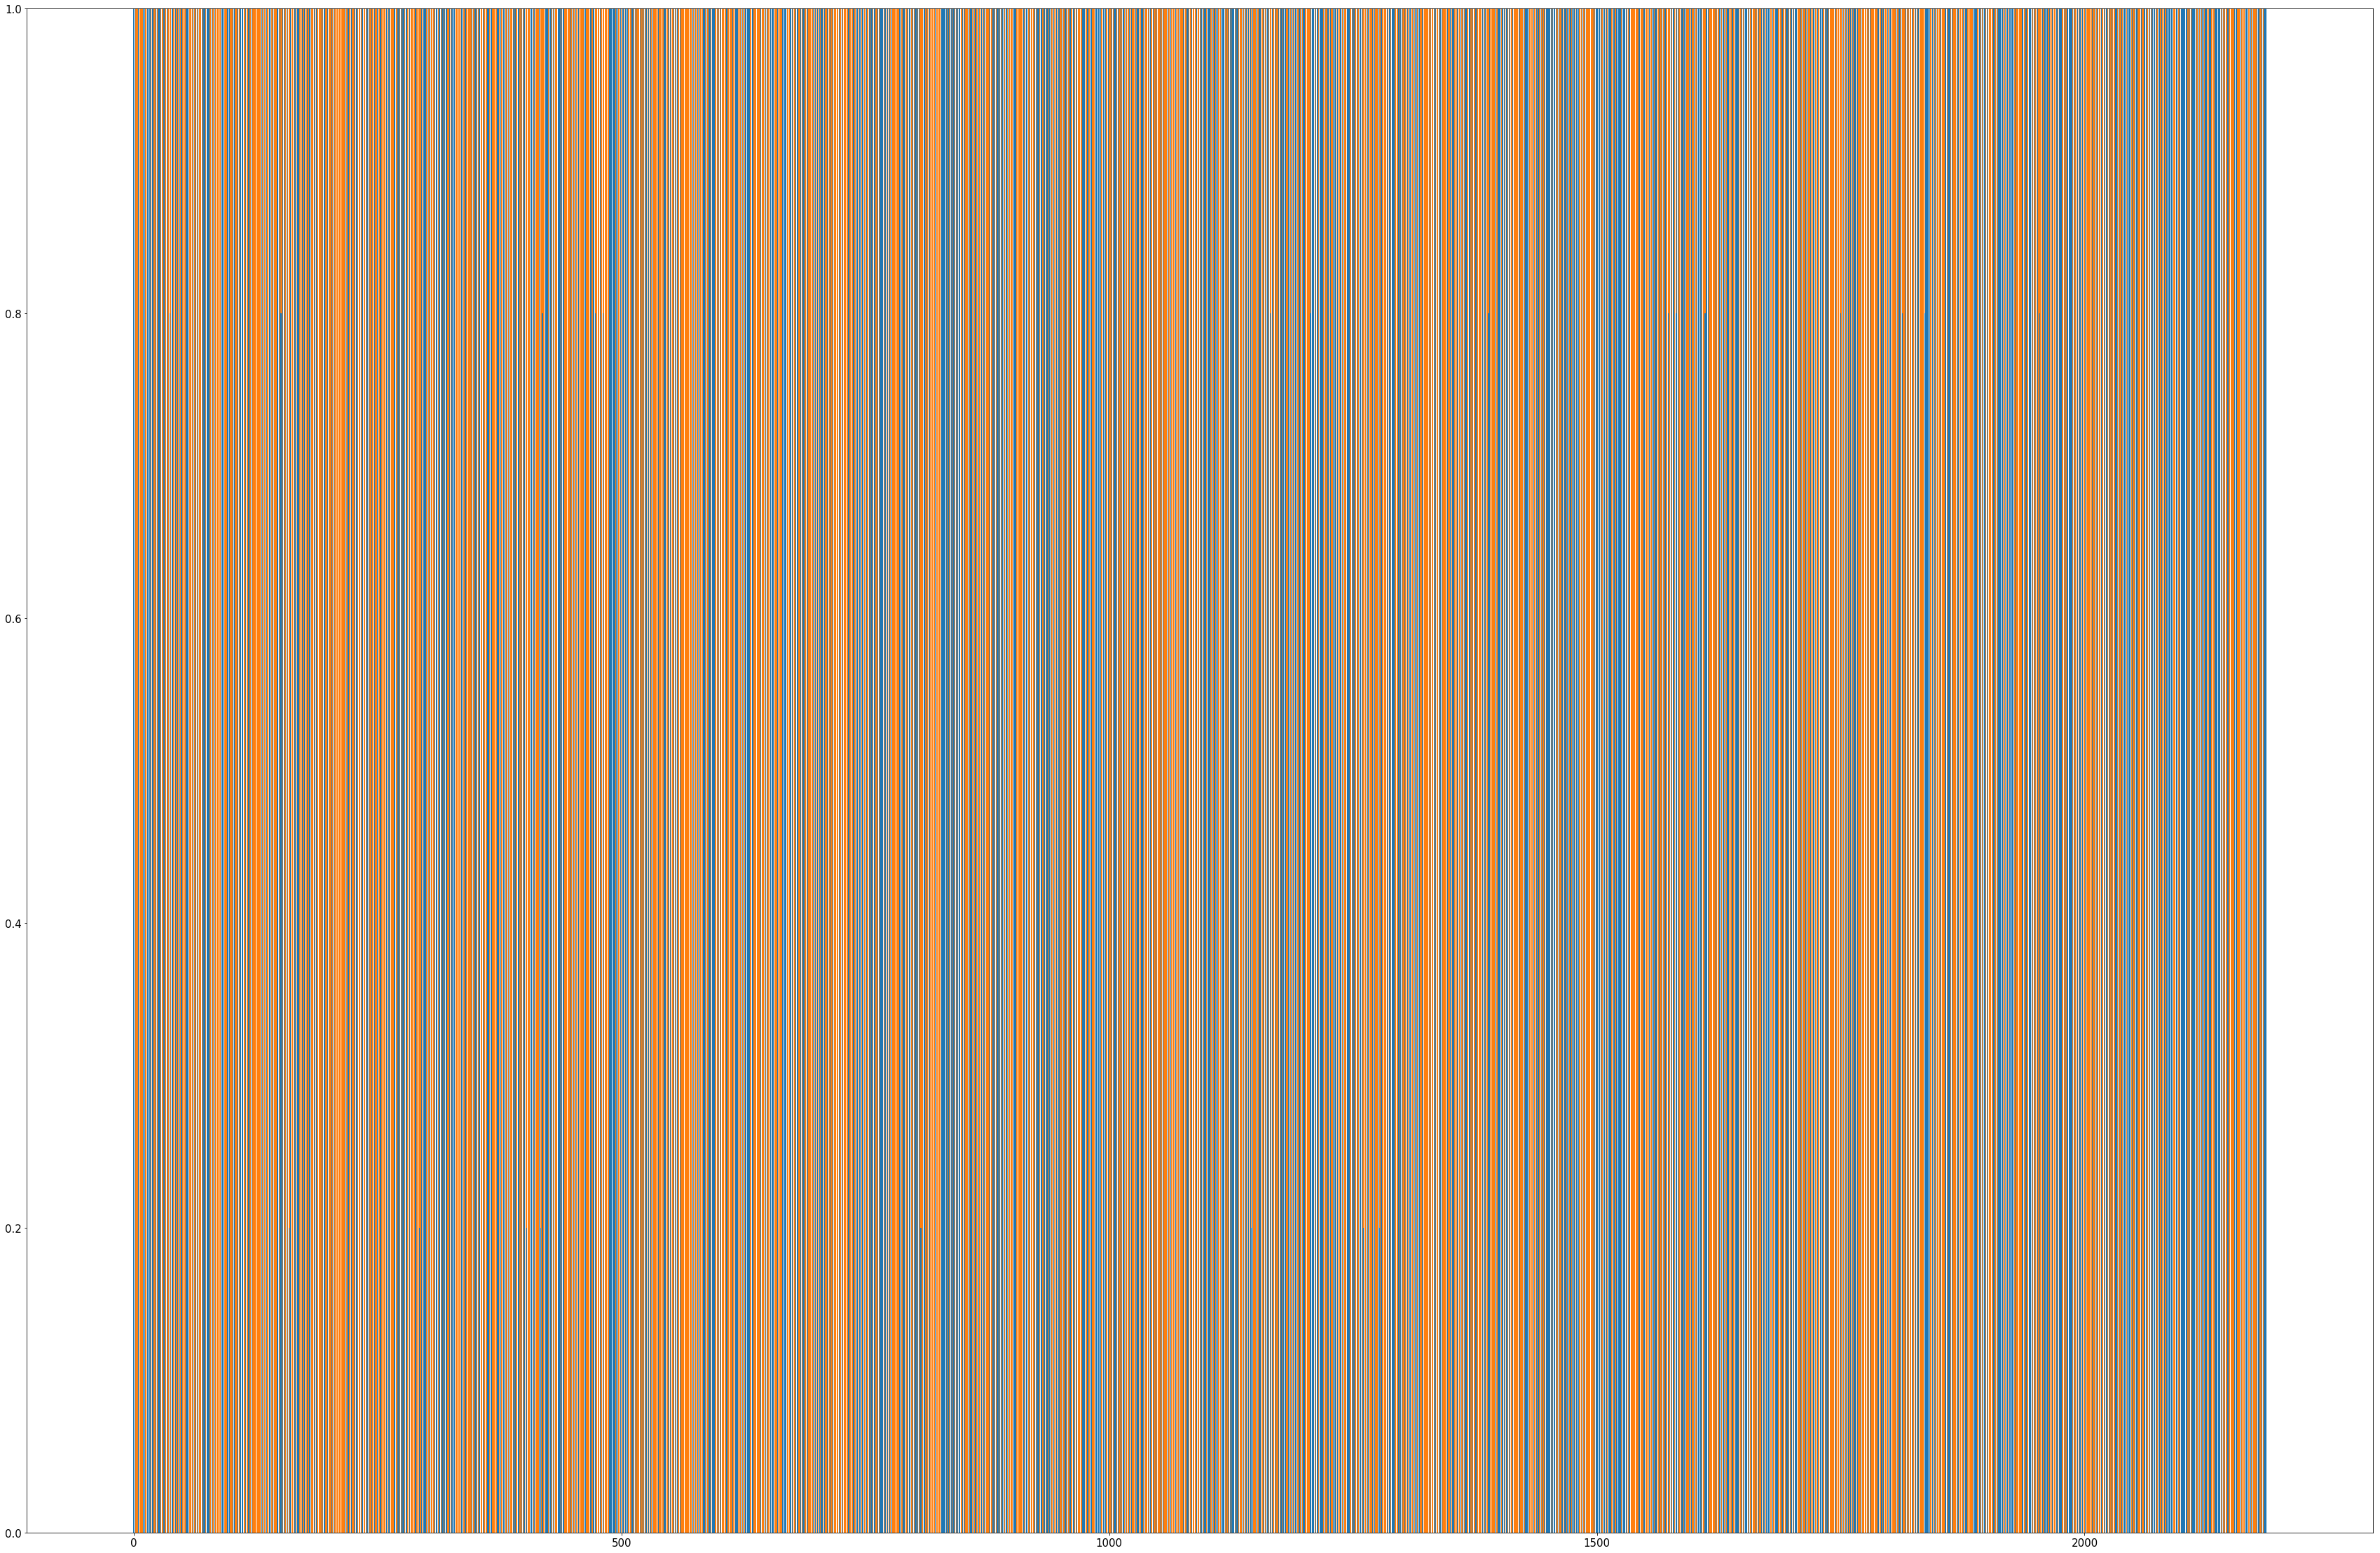

In [61]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
xvals5=[]
i = 0
while i< len(msa5[0]):
    xvals5.append(i)
    i += 1
fig5= plt.bar(height= at5, x= xvals5)
plt.bar(height= gc5, x= xvals5, bottom = 1)

<BarContainer object of 2190 artists>

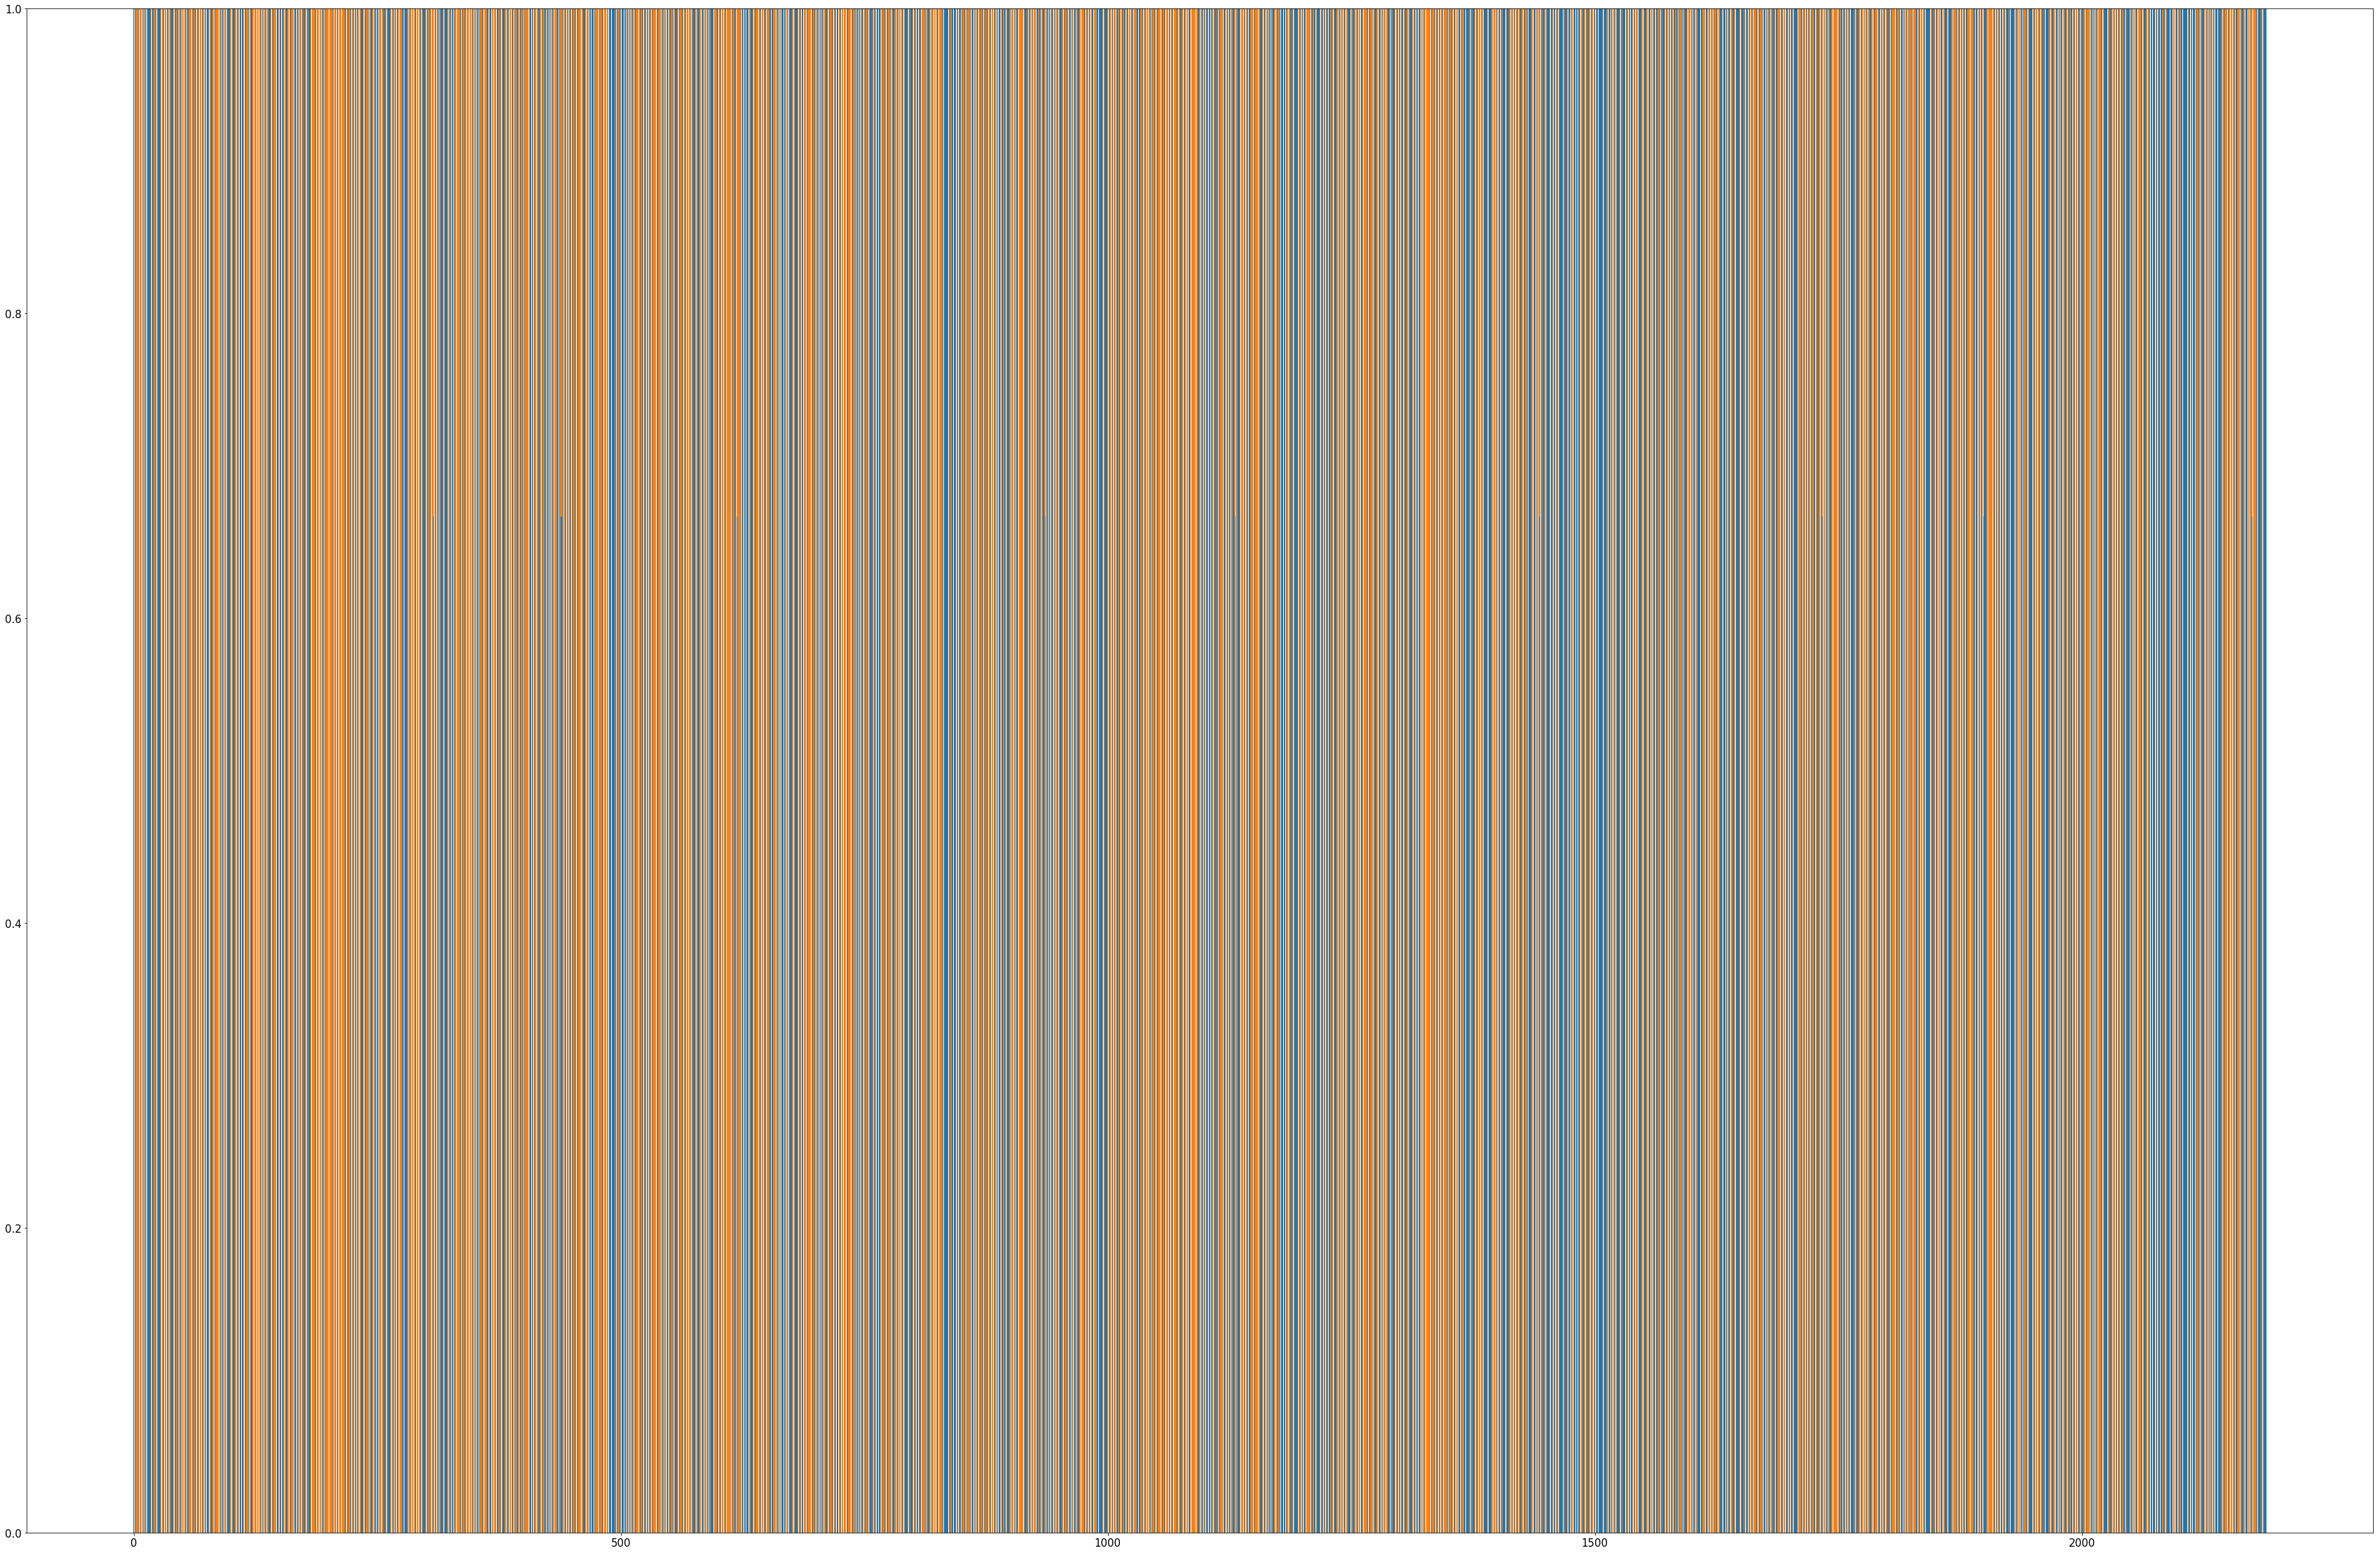

In [62]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
xvals6=[]
i = 0
while i< len(msa6[0]):
    xvals6.append(i)
    i += 1
fig6= plt.bar(height= at6, x= xvals6)
plt.bar(height= gc6, x= xvals6, bottom = 1)

<BarContainer object of 2214 artists>

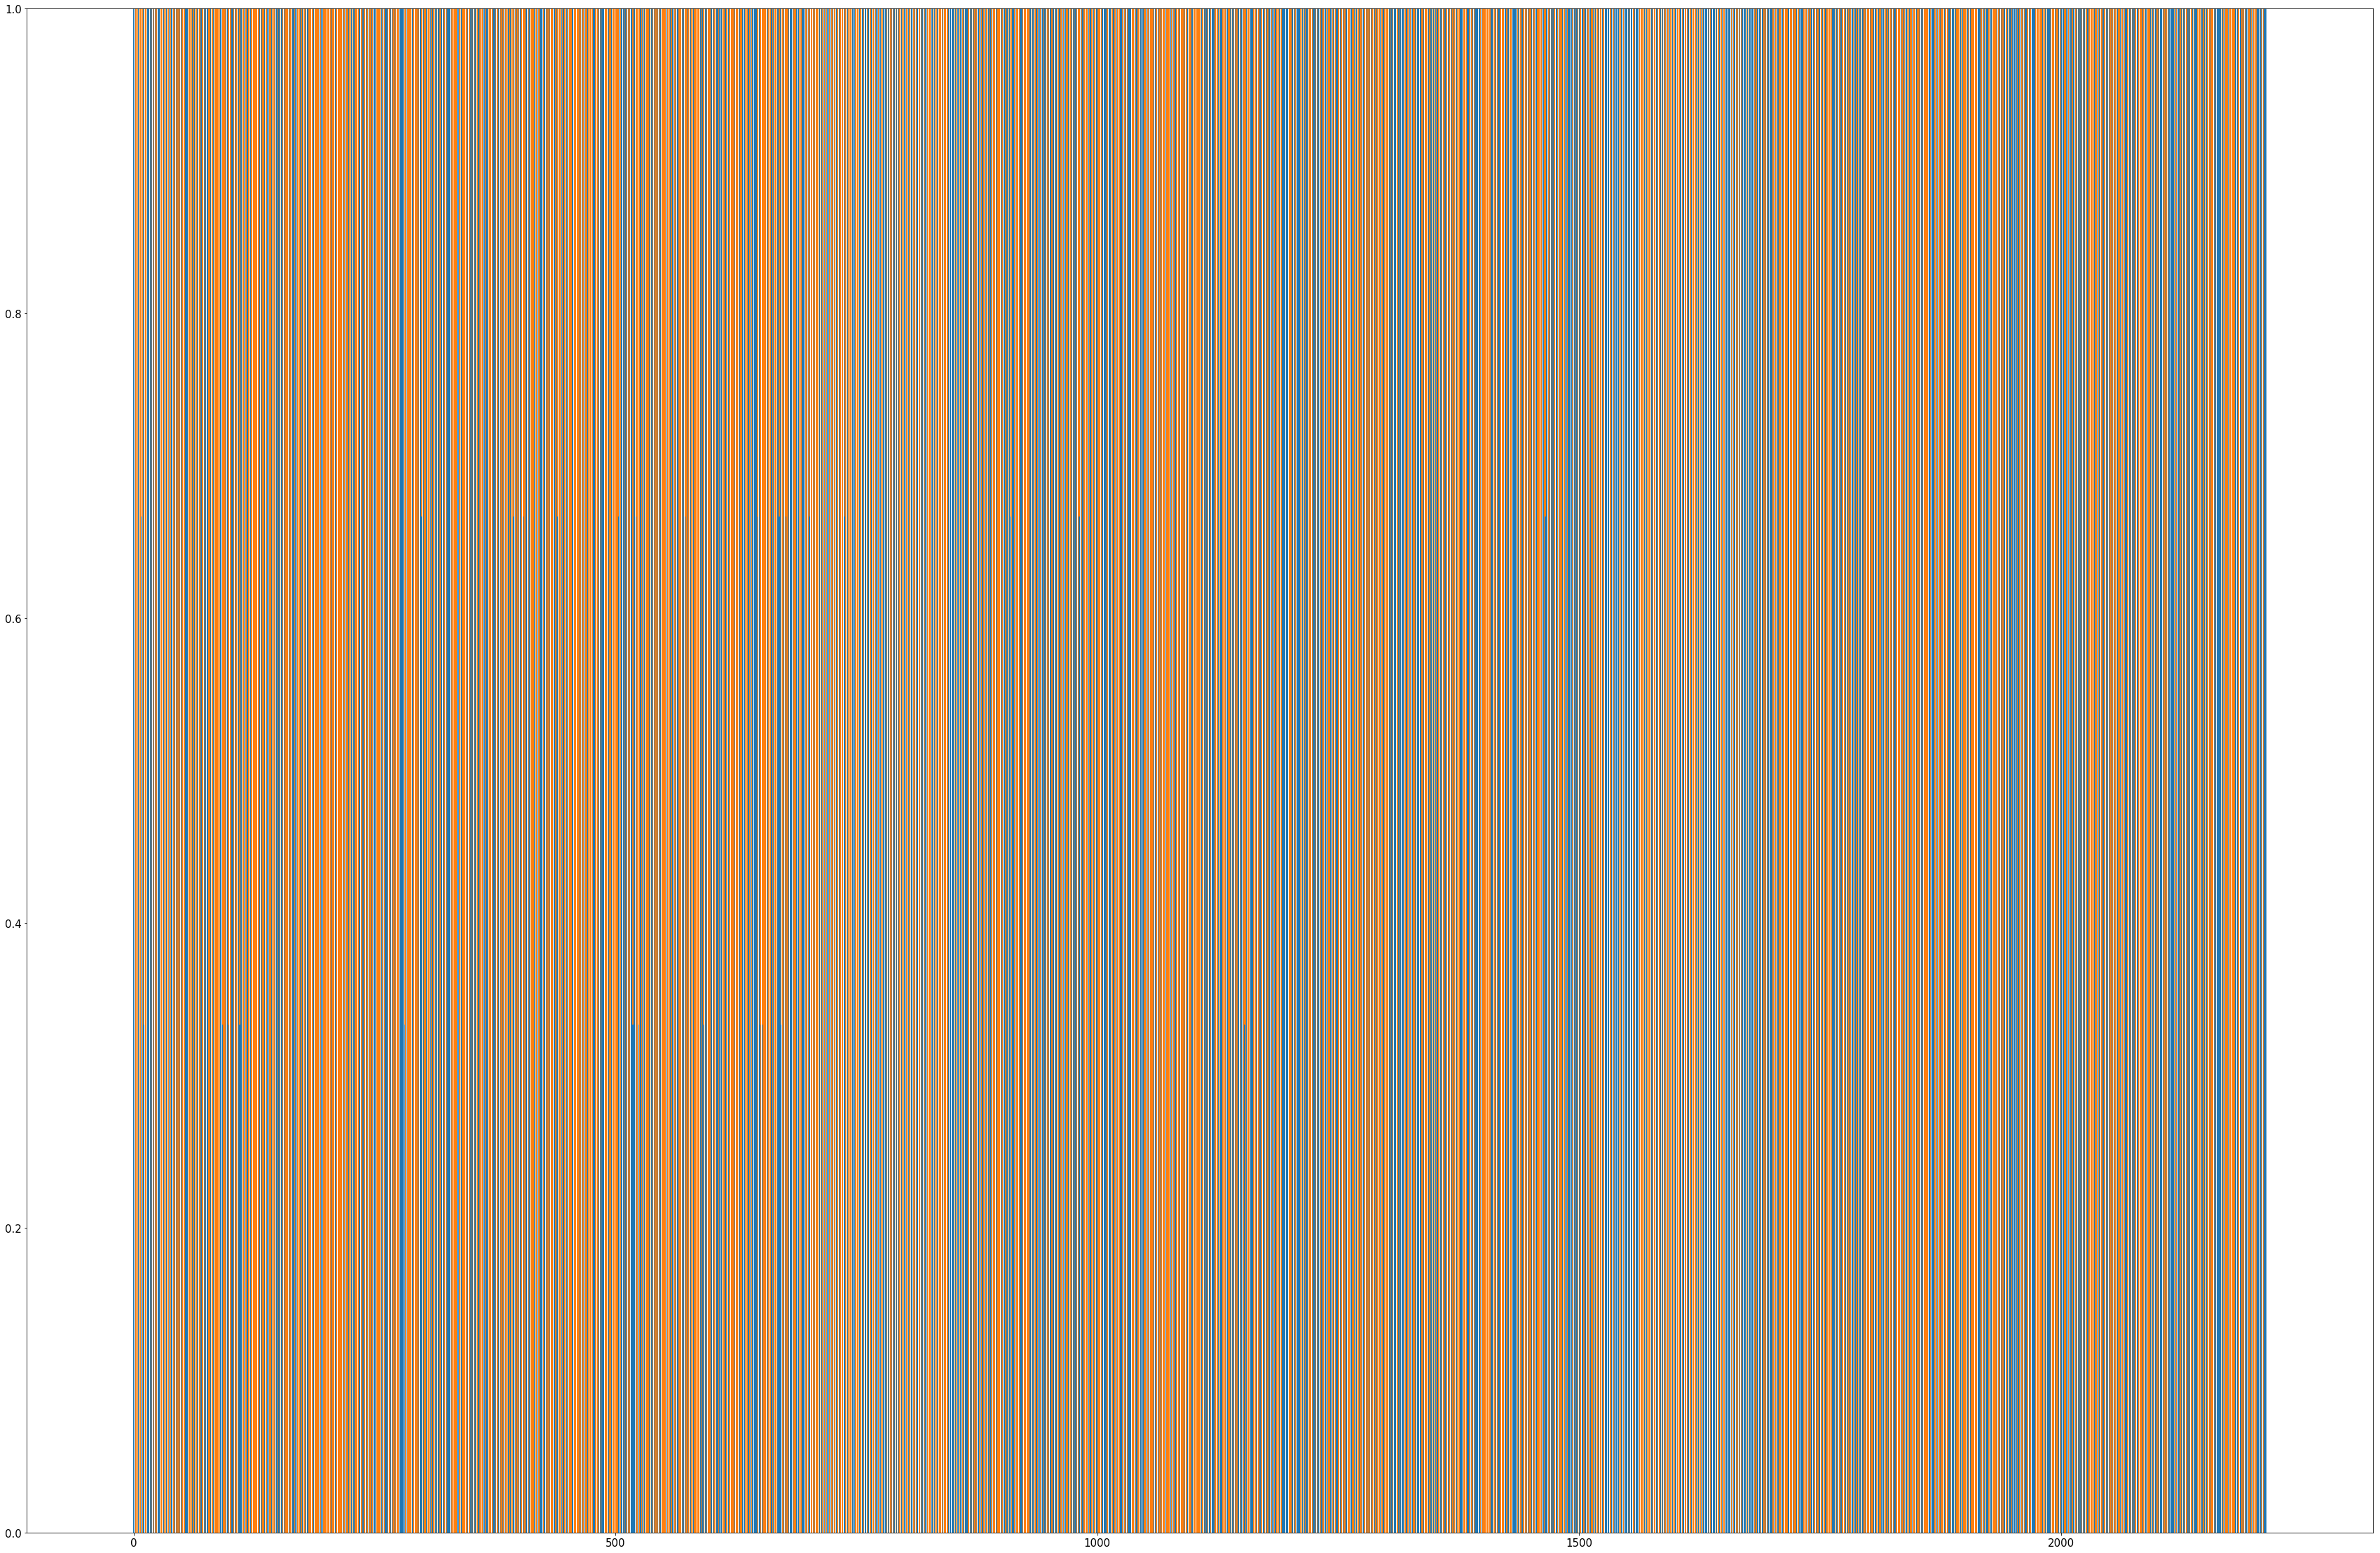

In [63]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
xvals7=[]
i = 0
while i< len(msa7[0]):
    xvals7.append(i)
    i += 1
fig7= plt.bar(height= at7, x= xvals7)
plt.bar(height= gc7, x= xvals7, bottom = 1)

<BarContainer object of 2211 artists>

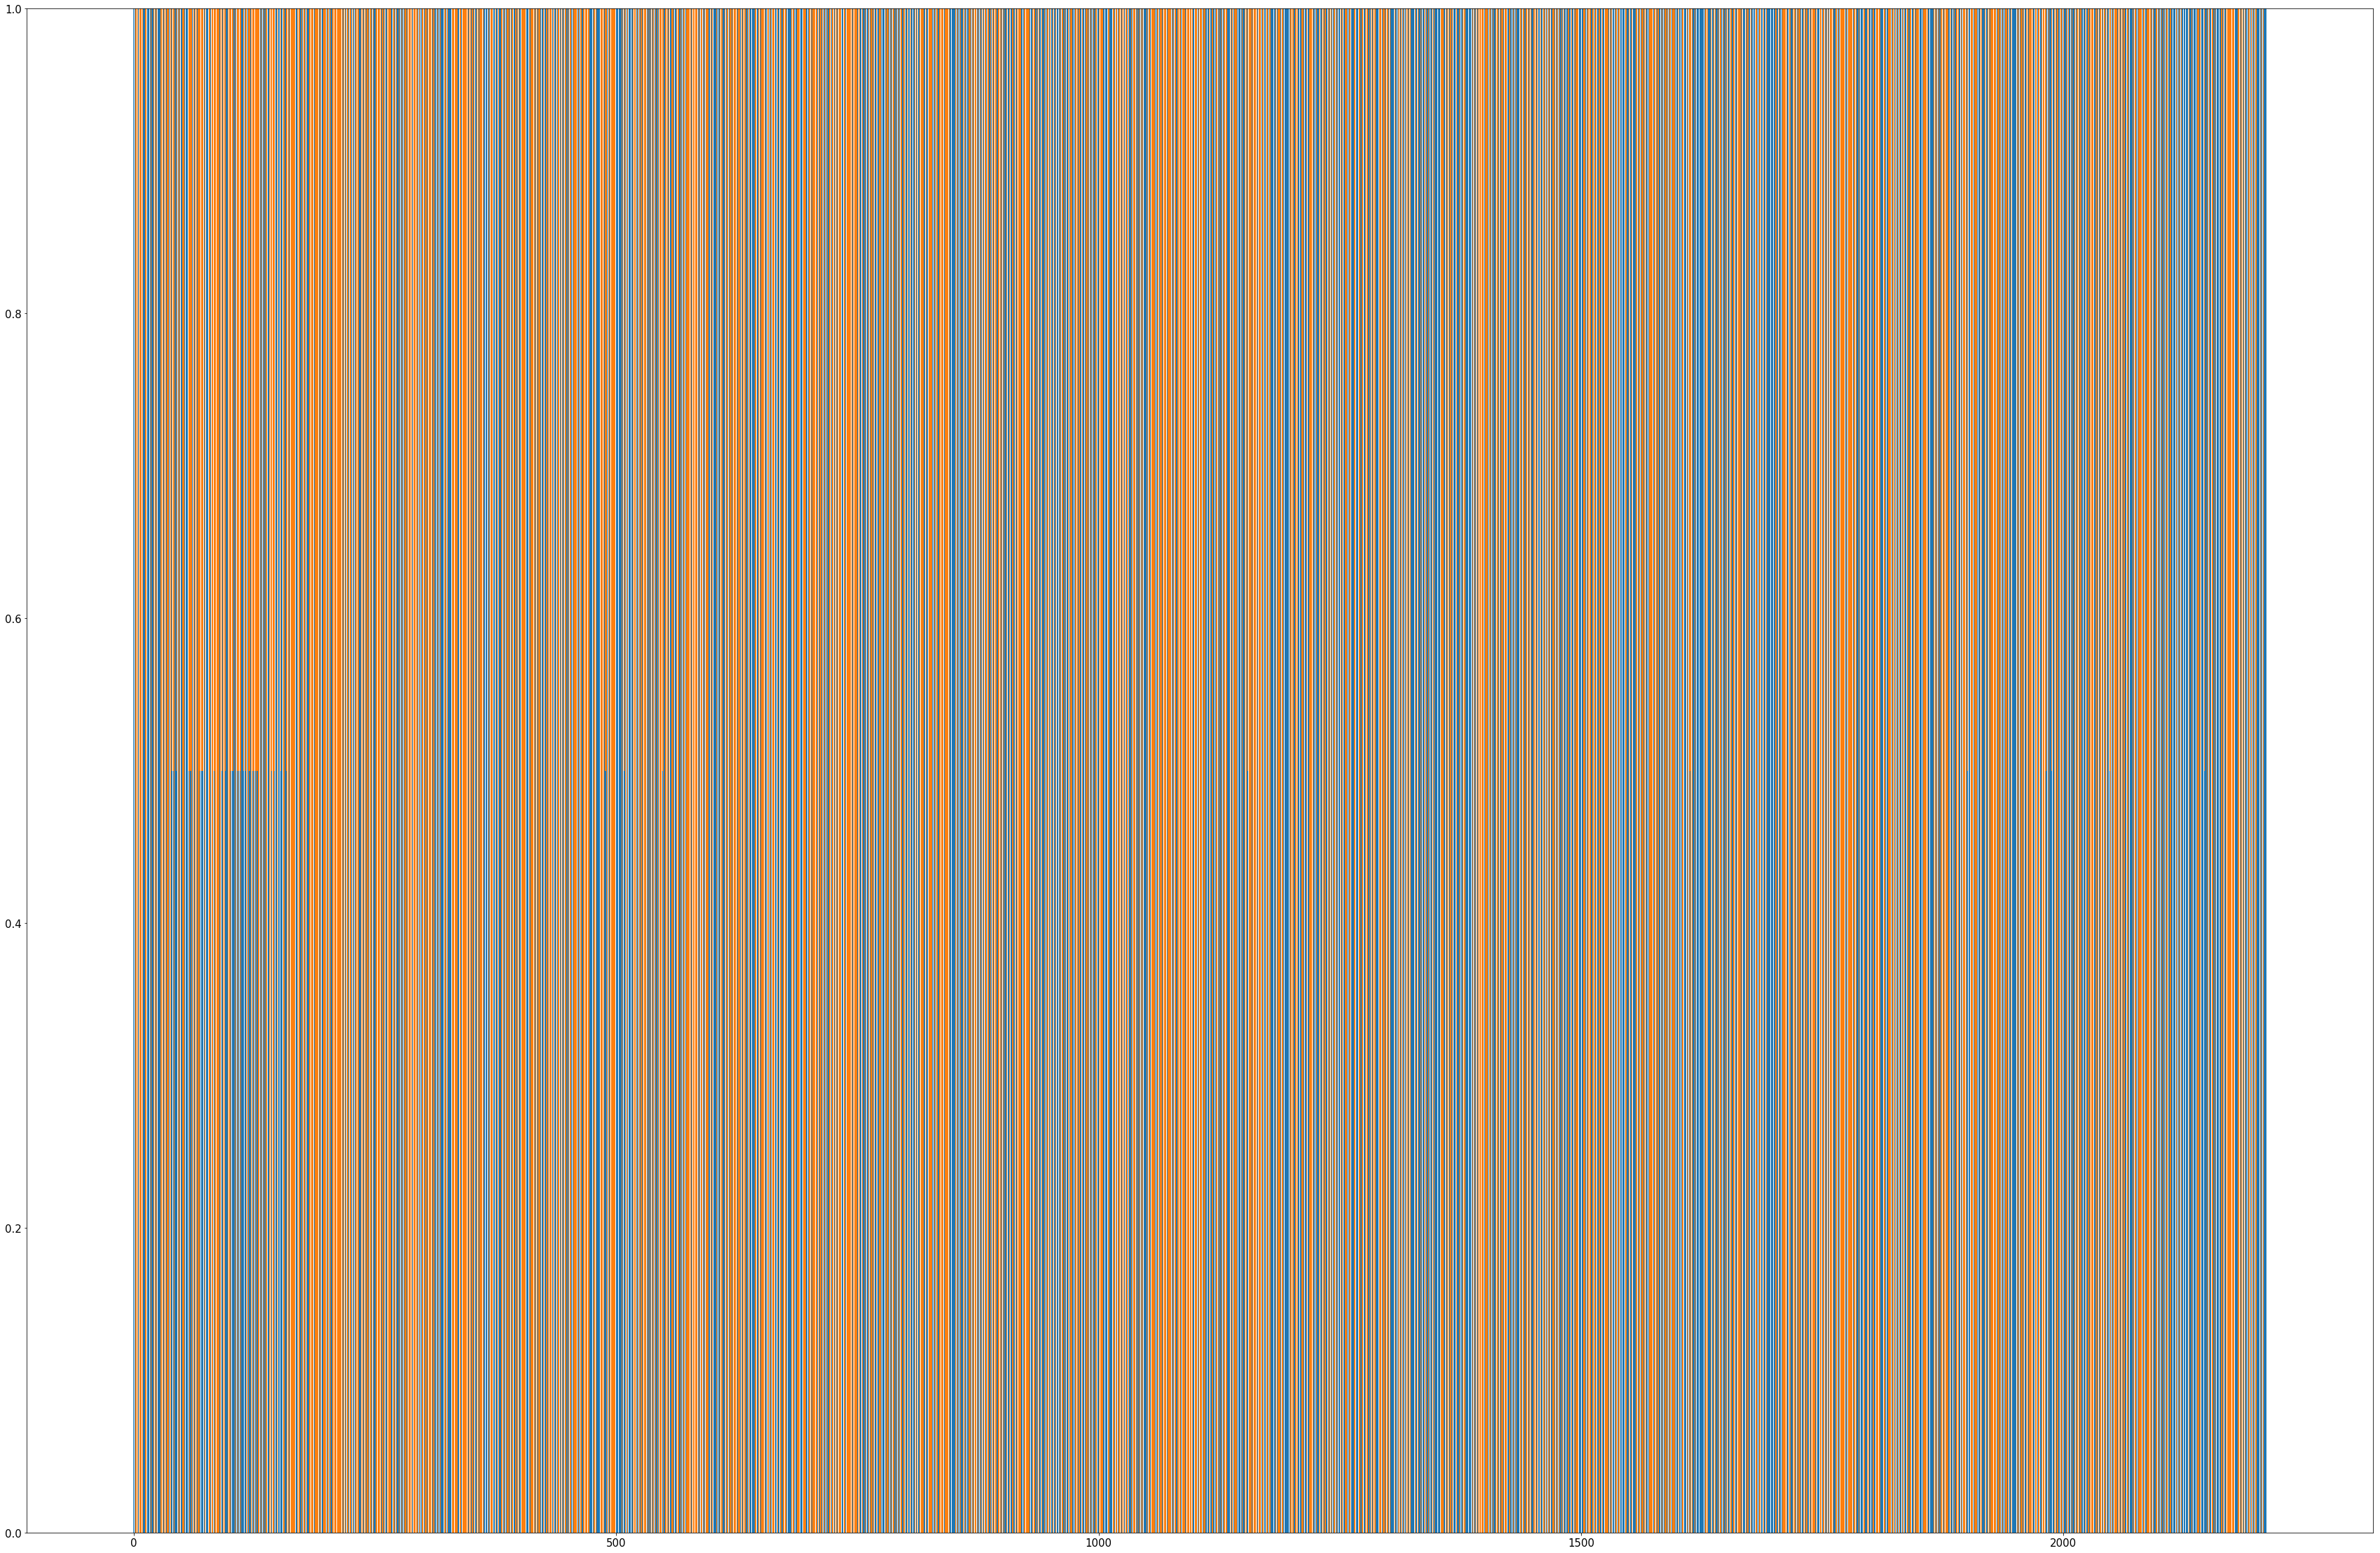

In [66]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
xvals8=[]
i = 0
while i< len(msa8[0]):
    xvals8.append(i)
    i += 1
fig8= plt.bar(height= at8, x= xvals8)
plt.bar(height= gc8, x= xvals8, bottom = 1)